Module

In [34]:
from ReNet5.dataset import POCDataset
from ReNet5.model import LeNet5, LeNet5_ReLU, LeNet5_224
from torch.utils.data import DataLoader
from ReNet5.util import *
import torch
import torchvision.transforms as transforms

Hyper Parameters

In [10]:
num_classes = 4
batch_size = 32
num_workers = 0
num_epochs = 20
learning_rate = 0.001
weight_decay = 1e-4

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device: ", device)

Device:  cpu


## LeNet-5 Original Architecture
Input: 32 * 32 gray scale image

In [12]:
transform = transforms.Compose([
    ToBinary(),
    Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))
])

In [13]:
ROOT_DIR = r"C:\Users\gony4\ComputerVision\ReNet5\POC_Dataset"

train_dataset = POCDataset(ROOT_DIR, "Training", resize=(32, 32), transform=transform)
test_dataset = POCDataset(ROOT_DIR, "Testing", resize=(32, 32), transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

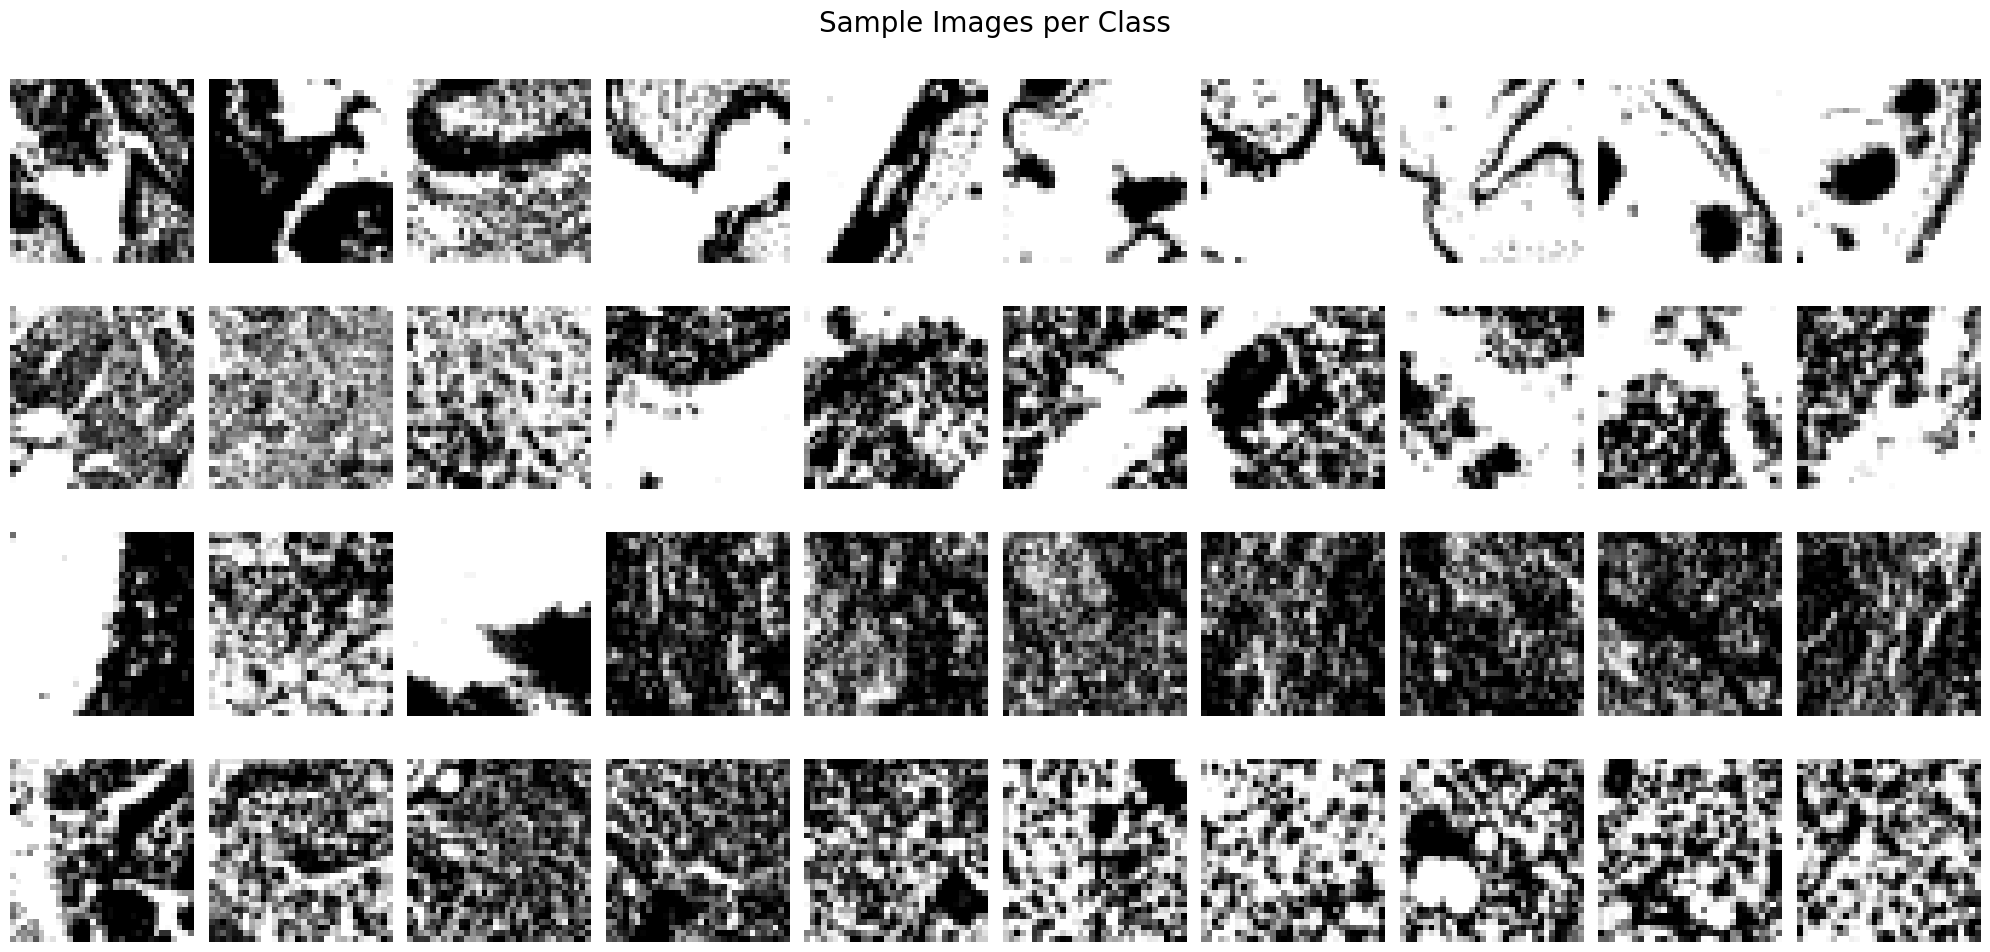

In [14]:
show_samples(train_dataset, 10)

### Paper Version
tanh, RBF, MSE

In [15]:
model = LeNet5(num_classes).to(device)

# Euclidean Radial basis function
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

In [16]:
best_acc = 0.0

for epoch in range(1, num_epochs+1):
    train_rbf(model, device, train_loader, criterion, optimizer, epoch)
    val_acc = evaluate_rbf(model, device, test_loader, criterion)

    # save best model
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), "best_lenet5.pth")
        print(f">>> Saved new best model (acc={best_acc:.4f})")

Epoch 1 - Loss: 3330.7413, Train Acc: 0.2212
Test Loss: 2540.5735, Test Acc: 0.2310
>>> Saved new best model (acc=0.2310)
Epoch 2 - Loss: 2096.9537, Train Acc: 0.2229
Test Loss: 1714.0887, Test Acc: 0.2310
Epoch 3 - Loss: 1439.8507, Train Acc: 0.2229
Test Loss: 1199.9539, Test Acc: 0.2310
Epoch 4 - Loss: 1023.4643, Train Acc: 0.2229
Test Loss: 866.9336, Test Acc: 0.2310
Epoch 5 - Loss: 748.9635, Train Acc: 0.2229
Test Loss: 643.0255, Test Acc: 0.2310
Epoch 6 - Loss: 561.5300, Train Acc: 0.2229
Test Loss: 487.5435, Test Acc: 0.2310
Epoch 7 - Loss: 429.5722, Train Acc: 0.2229
Test Loss: 376.4767, Test Acc: 0.2310
Epoch 8 - Loss: 334.3240, Train Acc: 0.2229
Test Loss: 295.3793, Test Acc: 0.2310
Epoch 9 - Loss: 264.0782, Train Acc: 0.2229
Test Loss: 234.9310, Test Acc: 0.2310
Epoch 10 - Loss: 211.2685, Train Acc: 0.2229
Test Loss: 189.0790, Test Acc: 0.2310
Epoch 11 - Loss: 170.9123, Train Acc: 0.2229
Test Loss: 153.7779, Test Acc: 0.2310
Epoch 12 - Loss: 139.6186, Train Acc: 0.2229
Test L

### Modern CNN Method
ReLU, Cross Entropy

In [17]:
model = LeNet5_ReLU(num_classes).to(device)

# Cross Entropy Loss
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

In [18]:
best_acc = 0.0

for epoch in range(1, num_epochs+1):
    train(model, device, train_loader, criterion, optimizer, epoch)
    val_acc = evaluate(model, device, test_loader, criterion)

    # save best model
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), "best_lenet_relu.pth")
        print(f">>> Saved new best model (acc={best_acc:.4f})")

Epoch 1 - Loss: 1.1505, Train Acc: 0.4664
Test Loss: 1.0300, Test Acc: 0.5222
>>> Saved new best model (acc=0.5222)
Epoch 2 - Loss: 0.9675, Train Acc: 0.6154
Test Loss: 0.9451, Test Acc: 0.6373
>>> Saved new best model (acc=0.6373)
Epoch 3 - Loss: 0.8640, Train Acc: 0.6698
Test Loss: 0.8817, Test Acc: 0.6353
Epoch 4 - Loss: 0.8185, Train Acc: 0.6948
Test Loss: 0.8495, Test Acc: 0.6704
>>> Saved new best model (acc=0.6704)
Epoch 5 - Loss: 0.7898, Train Acc: 0.6989
Test Loss: 0.8474, Test Acc: 0.6837
>>> Saved new best model (acc=0.6837)
Epoch 6 - Loss: 0.7663, Train Acc: 0.7085
Test Loss: 0.9378, Test Acc: 0.6433
Epoch 7 - Loss: 0.7410, Train Acc: 0.7218
Test Loss: 0.7672, Test Acc: 0.6896
>>> Saved new best model (acc=0.6896)
Epoch 8 - Loss: 0.7265, Train Acc: 0.7220
Test Loss: 0.8218, Test Acc: 0.6770
Epoch 9 - Loss: 0.7153, Train Acc: 0.7304
Test Loss: 0.8190, Test Acc: 0.6731
Epoch 10 - Loss: 0.6912, Train Acc: 0.7345
Test Loss: 0.7762, Test Acc: 0.6909
>>> Saved new best model (acc

## Custom Architecture for this Practice

In [20]:
transform = transforms.Compose([
    Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))
])

In [21]:
ROOT_DIR = r"C:\Users\gony4\ComputerVision\ReNet5\POC_Dataset"

train_dataset = POCDataset(ROOT_DIR, "Training", resize=(32, 32), transform=transform)
test_dataset = POCDataset(ROOT_DIR, "Testing", resize=(32, 32), transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

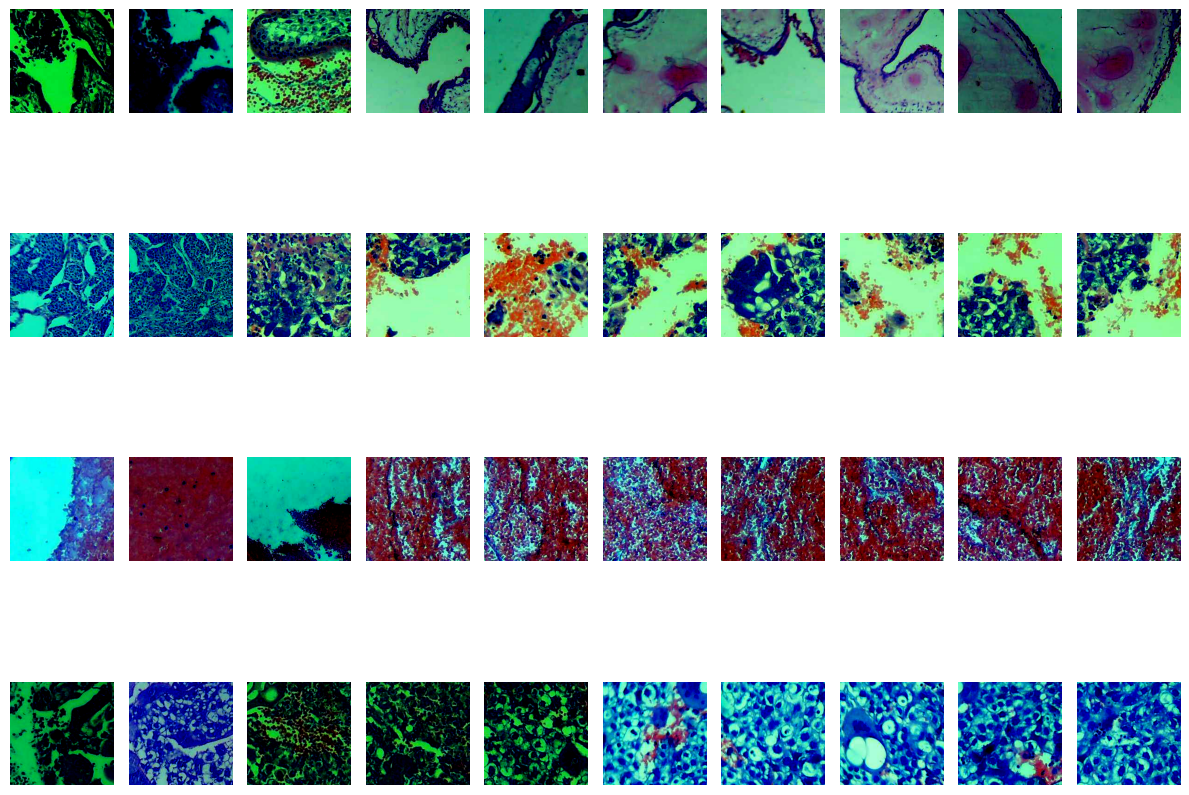

In [33]:
show_samples(train_dataset, 10)

### Custom
Input: 224 * 224 3 channel(RGB)

ReLU, CrossEntropy

In [35]:
model = LeNet5_224(num_classes).to(device)

# Cross Entropy Loss
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

In [36]:
best_acc = 0.0

for epoch in range(1, num_epochs+1):
    train(model, device, train_loader, criterion, optimizer, epoch)
    val_acc = evaluate(model, device, test_loader, criterion)

    # save best model
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), "best_lenet5_224.pth")
        print(f">>> Saved new best model (acc={best_acc:.4f})")

Epoch 1 - Loss: 1.0727, Train Acc: 0.5122
Test Loss: 0.8770, Test Acc: 0.6274
>>> Saved new best model (acc=0.6274)
Epoch 2 - Loss: 0.7948, Train Acc: 0.6693
Test Loss: 0.9137, Test Acc: 0.6168
Epoch 3 - Loss: 0.6281, Train Acc: 0.7593
Test Loss: 0.8105, Test Acc: 0.6863
>>> Saved new best model (acc=0.6863)
Epoch 4 - Loss: 0.5339, Train Acc: 0.7961
Test Loss: 0.6773, Test Acc: 0.7353
>>> Saved new best model (acc=0.7353)
Epoch 5 - Loss: 0.4638, Train Acc: 0.8243
Test Loss: 0.7163, Test Acc: 0.7366
>>> Saved new best model (acc=0.7366)
Epoch 6 - Loss: 0.3866, Train Acc: 0.8554
Test Loss: 0.7810, Test Acc: 0.7194
Epoch 7 - Loss: 0.3745, Train Acc: 0.8580
Test Loss: 0.6402, Test Acc: 0.7584
>>> Saved new best model (acc=0.7584)
Epoch 8 - Loss: 0.3352, Train Acc: 0.8799
Test Loss: 0.7092, Test Acc: 0.7611
>>> Saved new best model (acc=0.7611)
Epoch 9 - Loss: 0.2487, Train Acc: 0.9085
Test Loss: 0.7527, Test Acc: 0.7505
Epoch 10 - Loss: 0.2393, Train Acc: 0.9110
Test Loss: 0.8354, Test Acc